In [35]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-09-10 23:03:16,788: Credentials are already in use. The existing account in the session will be replaced.


# Chapter 10 - Aer

In [36]:
# View all available Aer backends
Aer.backends()


[<QasmSimulator('qasm_simulator') from AerProvider()>,
 <StatevectorSimulator('statevector_simulator') from AerProvider()>,
 <UnitarySimulator('unitary_simulator') from AerProvider()>,
 <PulseSimulator('pulse_simulator') from AerProvider()>]

In [37]:
from qiskit import BasicAer
BasicAer.backends() 


[<QasmSimulatorPy('qasm_simulator') from BasicAer()>,
 <StatevectorSimulatorPy('statevector_simulator') from BasicAer()>,
 <UnitarySimulatorPy('unitary_simulator') from BasicAer()>]

In [38]:
# View all available IBMQ backends
provider.backends()


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [39]:
# View all IBMQ provider simulators only
provider.backends(simulator=True)


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [40]:
# Create a quantum circuit
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])


In [41]:
# Import the QasmSimulator from Aer provider
from qiskit.providers.aer import QasmSimulator
backend_simulator = QasmSimulator()
# Set the backend options, method set to statevector
options = {'method': 'statevector'}
# Execute circuit using the backend options created
job = execute(qc, backend_simulator, backend_options=options)
# Print out the result counts
result = job.result()
counts = result.get_counts(qc)
print(counts)


{'00': 526, '11': 498}


In [42]:
# Get the Qasm simulator and set the backend options
aer_qasm_simulator = Aer.get_backend('qasm_simulator')
options = {'method': 'statevector'}
# Execute the circuit with the Aer Qasm simulator
job = execute(qc, aer_qasm_simulator, backend_options=options)


In [43]:
# Set the backend options, method set to statevector
options = {'method': 'statevector', 'memory':True, 'shots':10}
# Execute circuit using the backend options created
job = execute(qc, backend_simulator, backend_options=options)
result = job.result()
# Pull the memory slots for the circuit
memory = result.get_memory(qc)
# Print the results from the memory slots
print('Memory results: ', memory)


Memory results:  ['11', '00', '00', '11', '00', '00', '11', '00', '00', '11']


In [44]:
# View each measurement individually by enabling the memory parameter
aer_backend = Aer.get_backend('qasm_simulator')
# Set backend, shots, and memory parameters and retrieve results
result = execute(qc, backend=aer_backend, shots=5, memory=True).result()

# Pull the memory slots results
memory = result.get_memory(qc)

# Print the memory slots
print('Memory results: ', memory)


Memory results:  ['11', '00', '11', '11', '00']


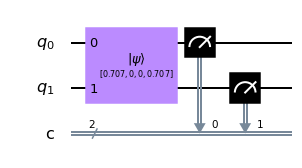

In [45]:
# Construct a 2 qubit quantum circuit
qc_init = QuantumCircuit(2, 2)
# Import numpy to simplify some math for us
import numpy as np
# Select the qubits by their index which you wish to initialize
init_qubits = [0, 1]
# Inititialize qubit states
qc_init.initialize([1, 0, 0, 1] / np.sqrt(2), init_qubits)
# Add measurements and draw the initialized circuit
qc_init.measure(range(2), range(2))
qc_init.decompose()
qc_init.draw()


In [46]:
# Set the memory to True so we can observe each result
result = execute(qc_init, aer_backend, shots=10, memory=True).result()
# Retrieve the individual results from the memory slots
memory = result.get_memory(qc_init)
# Print the memory slots
print(memory)


['11', '00', '11', '00', '11', '11', '11', '00', '00', '00']


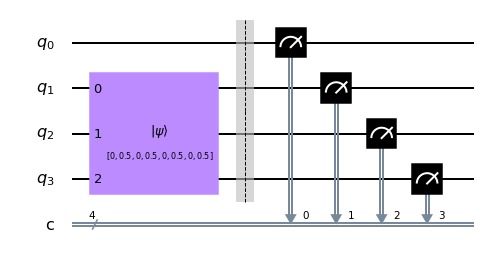

In [47]:
# Create a 4 qubit circuit
qc_init2 = QuantumCircuit(4, 4)

# Import numpy to help with some arithmetic
import numpy as np
# Initialize only the last 3 qubits
initialized_qubits = [1, 2, 3]

# Set the initial state, remember that the sum of amplitudes-squared 
# must equal 1
qc_init2.initialize([0, 1, 0, 1, 0, 1, 0, 1] / np.sqrt(4), initialized_qubits)

# Add a barrier so it is easier to read
qc_init2.barrier(range(4))

# Measure qubits, decompose and draw circuit
qc_init2.measure(range(4), range(4))
qc_init2.decompose()
qc_init2.draw()


{'0010': 277, '0110': 244, '1010': 267, '1110': 236}


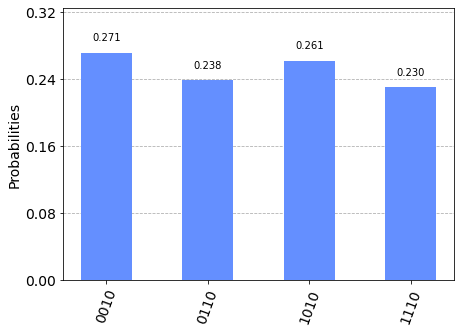

In [48]:
# Execute the circuit and print results and histogram
result = execute(qc_init2, backend_simulator).result()
counts = result.get_counts(qc_init2)
print(counts)
plot_histogram(counts)


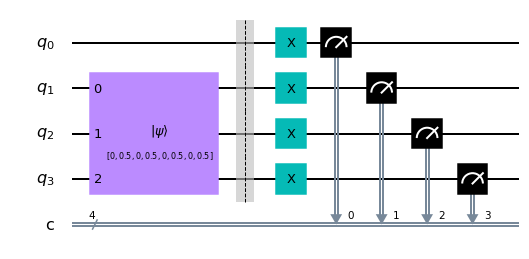

In [49]:
# Create a 4-qubit circuit
qc_init_x = QuantumCircuit(4, 4)
# Import numpy 
import numpy as np
# Initialize the last 3 qubits, same as before
initialized_qubits = [1, 2, 3]
qc_init_x.initialize([0, 1, 0, 1, 0, 1, 0, 1] / np.sqrt(4), initialized_qubits)

# Add a barrier so it is easier to read
qc_init_x.barrier(range(4))
# Include an X gate on all qubits
for idx in range(4):
    qc_init_x.x(idx)
# Measure and draw the circuit
qc_init_x.measure(range(4), range(4))
qc_init_x.decompose()
qc_init_x.draw()


{'0001': 243, '0101': 276, '1001': 238, '1101': 267}


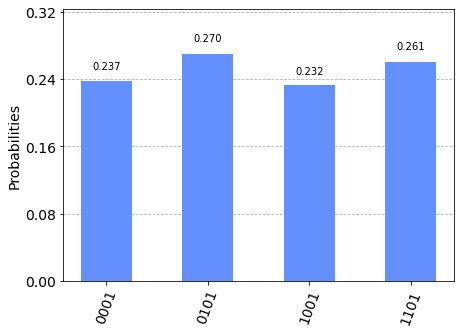

In [50]:
# Execute and get counts
result = execute(qc_init_x, backend_simulator).result()
counts = result.get_counts(qc_init_x)
print(counts)
plot_histogram(counts)


# Running on a statevector simulator

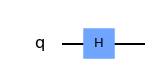

In [51]:
# Construct quantum circuit
qc = QuantumCircuit(1)
# Place qubit in superposition
qc.h(0)
qc.draw()


In [52]:
# Select the Statevector simulator from the Aer provider
simulator = Aer.get_backend('statevector_simulator')
# Execute the circuit
result = execute(qc, simulator).result()
# Get the state vector and display the results
statevector = result.get_statevector(qc)
statevector


array([0.70710678+0.j, 0.70710678+0.j])

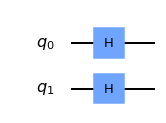

In [53]:
# Construct quantum circuit 
qc = QuantumCircuit(2)
# Place both in superposition
qc.h(0)
qc.h(1)
qc.draw()


In [54]:
# Execute the circuit using the state vector simulator
result = execute(qc, simulator).result()
# Extract the state vector of the circuit from the results
statevector = result.get_statevector(qc)
# Output the state vector values
statevector


array([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])

In [55]:
# Construct quantum circuit
qc = QuantumCircuit(2)
# Place the first qubit in superposition
qc.h(0)
# Entangle the two qubits together using a CNOT gate, 
# where the first is the control and the second qubit is the target.
qc.cx(0, 1)
# Execute the circuit on the state vector simulator
result = execute(qc, simulator).result()
# Obtain the state vector of the circuit
statevector = result.get_statevector(qc)
# Output the state vector values
statevector


array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

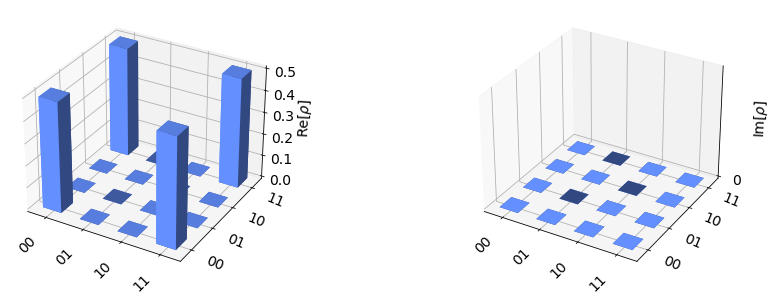

In [56]:
# Display state vector
plot_state_city(statevector)


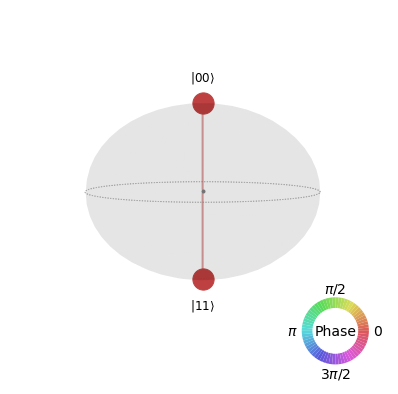

In [57]:
# Import the qsphere class
from qiskit.visualization import plot_state_qsphere
%matplotlib inline
# Create quantum circuit
qc = QuantumCircuit(1)
# Place the qubit in a superposition state
qc.h(0)
# Execute the circuit on the statevector simulator
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator).result()
# Display the QSphere with result
plot_state_qsphere(statevector)

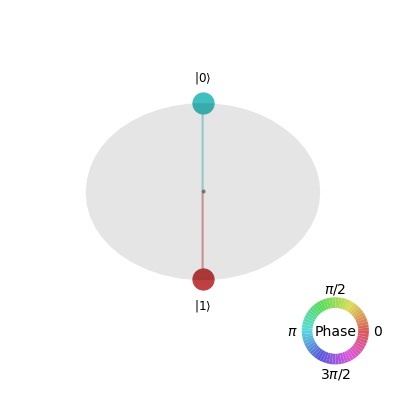

In [58]:
# Create a quantum circuit
qc = QuantumCircuit(1)
# Rotate the state from |0 to |1 by applying an X gate
qc.x(0)
# Place qubit in a superposition from the |1 state
qc.h(0)
# Execute the circuit on the state vector simulator
job = execute(qc, simulator).result()
# Plot the results onto the QSphere
plot_state_qsphere(job.get_statevector(qc))


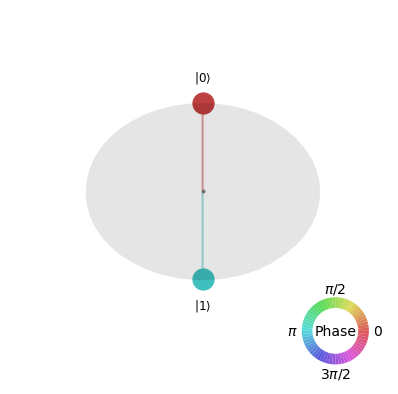

In [59]:
# Create a quantum circuit
qc = QuantumCircuit(1)
# Place qubit in a superposition from the |0 state
qc.h(0)
# Apply a Z (phase) gate, to rotate it by an angle  around the Z axis
qc.z(0)
# Execute the circuit on the state vector simulator
job = execute(qc, simulator).result()
# Plot the results onto the QSphere
plot_state_qsphere(job.get_statevector(qc))


# Running on a Unitary simulator

In [60]:
# Create a quantum circuit and add a Hadamard gate
qc = QuantumCircuit(1)
qc.h(0)

# Set the simulator to the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')

# Execute the circuit on the unitary simulator
result = execute(qc, simulator).result()
# Extract the unitary matrix from the results
unitary = result.get_unitary(qc)
# Print out the unitary matrix
print("Unitary of the circuit:\n", unitary)


Unitary of the circuit:
 [[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]]


Unitary of the circuit:
 [[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [-0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]]


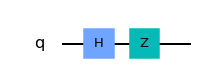

In [61]:
# Create a new circuit, adding an H gate followed by a Z gate
qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)

# Execute the circuit on the unitary simulator
result = execute(qc, simulator).result()
# Retrieve the unitary matrix from the results
unitary = result.get_unitary(qc)
# Print the unitary matrix
print("Unitary of the circuit:\n", unitary)
qc.draw()


In [62]:
# Create a quantum circuit
qc_init = QuantumCircuit(1)
# Set the initial unitary using the result from the previous example.
opts = {"initial_unitary": np.array([[ 1,  1],
                                     [-1, 1]]/np.sqrt(2))}

# Execute and obtain Unitary matrix of the circuit
result = execute(qc_init, simulator, backend_options=opts).result()
# Retrieve the unitary matrix from the result
unitary = result.get_unitary(qc_init)
# Print the unitary matrix results
print("Unitary of the circuit:\n", unitary)


Unitary of the circuit:
 [[ 0.70710678+0.j  0.70710678+0.j]
 [-0.70710678+0.j  0.70710678+0.j]]


# Running on a Pulse simulator

In [63]:
# Import the PulseSystemModel
from qiskit.providers.aer.pulse import PulseSystemModel
# Import Pulse classes needed to generate a schedule
from qiskit.pulse import Play, DriveChannel
from qiskit.pulse import Schedule, Waveform

# Import numpy and generate the sin sample values
import numpy as np
x = np.linspace(0,2*np.pi,64)
data = np.sin(x)
# Generate a SamplePulse 
sample_pulse = Waveform(data, name="sin_64_pulse") 
# Create a schedule
schedules = Schedule(name='pulse_sample_schedule')
# Operate on the first qubit
qubit_idx = 0
# Insert the sample pulse
schedules = schedules.insert(0, Play(sample_pulse, DriveChannel(qubit_idx)))

# Instantiate the PulseSimulator
from qiskit.providers.aer import PulseSimulator
backend_sim = PulseSimulator()


# Assemble schedules using PulseSimulator as the backend
pulse_qobj = assemble(schedules, backend=backend_sim)
# Set the system model by replicating the ibmq_armonk backend
armonk_backend = provider.get_backend('ibmq_armonk')
system_model = PulseSystemModel.from_backend(armonk_backend)

# Run simulation on a PulseSystemModel object and print results
results = backend_sim.run(pulse_qobj, system_model)
print(results.qobj())


/opt/conda/lib/python3.7/site-packages/qiskit/compiler/assemble.py:323: RuntimeWarning: Dynamic rep rates not supported on this backend. rep_time will be used instead of rep_delay.
  RuntimeWarning,


Pulse Qobj: 1622a073-0855-4987-b957-d5343424f8f9:
Config: {'init_qubits': True,
 'meas_level': 2,
 'meas_lo_freq': [inf],
 'meas_return': 'avg',
 'memory': False,
 'memory_slot_size': 100,
 'memory_slots': 1,
 'parametric_pulses': [],
 'pulse_library': [{'name': '2f613389417215751c42c82118155cdf2abc51325c3c997a5c836d970b0ddd64',
                    'samples': array([ 0.00000000e+00+0.j,  9.95678466e-02+0.j,  1.98146143e-01+0.j,
        2.94755174e-01+0.j,  3.88434796e-01+0.j,  4.78253979e-01+0.j,
        5.63320058e-01+0.j,  6.42787610e-01+0.j,  7.15866849e-01+0.j,
        7.81831482e-01+0.j,  8.40025923e-01+0.j,  8.89871809e-01+0.j,
        9.30873749e-01+0.j,  9.62624247e-01+0.j,  9.84807753e-01+0.j,
        9.97203797e-01+0.j,  9.99689182e-01+0.j,  9.92239207e-01+0.j,
        9.74927912e-01+0.j,  9.47927346e-01+0.j,  9.11505852e-01+0.j,
        8.66025404e-01+0.j,  8.11938006e-01+0.j,  7.49781203e-01+0.j,
        6.80172738e-01+0.j,  6.03804410e-01+0.j,  5.21435203e-01+0.j,
        

# Generating Noise models

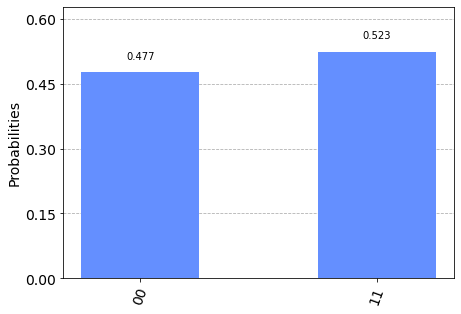

In [64]:
from qiskit.tools.visualization import plot_histogram
# Create a 2-qubit circuit 
qc = QuantumCircuit(2, 2)
# Add some arbitrary gates and measurement operators
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

# Execute the circuit on the qasm simulator
result = execute(qc, Aer.get_backend('qasm_simulator')).result()
# Obtain and print results 
counts = result.get_counts()
plot_histogram(counts)


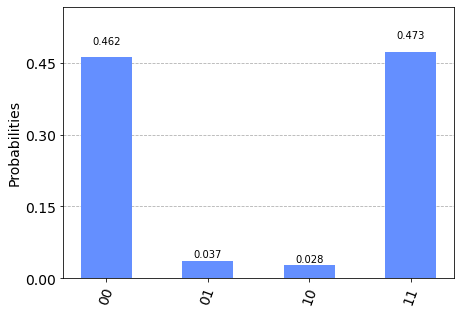

In [65]:
# Execute the same circuit on a real quantum computer
result = execute(qc, provider.get_backend('ibmq_valencia')).result()
# Obtain and print results
counts = result.get_counts()
plot_histogram(counts)


In [74]:
from qiskit.providers.ibmq import least_busy

backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (num_qubits) and
                                   not x.configuration().simulator and x.status().operational==True))
print("Set backend: ", backend)

# Launch the job watcher widget
%qiskit_job_watcher

Set backend:  ibmqx2


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

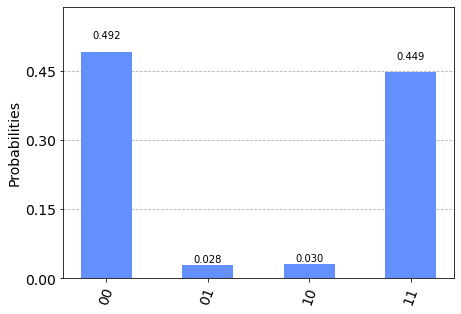

In [66]:
# Import the NoiseModel
from qiskit.providers.aer.noise import NoiseModel

# Create the noise model based on the backend properties
noise_model = NoiseModel.from_backend(backend)

# Get coupling map from backend
coupling_map = backend.configuration().coupling_map

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

# Execute the circuit on the simulator with the backend properties, 
# and generated noise model
result = execute(qc, Aer.get_backend('qasm_simulator'),
                 coupling_map=coupling_map,
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()
# Obtain and print results
counts = result.get_counts()
plot_histogram(counts)


NoiseModel:
  Basis gates: ['cx', 'id', 'u1', 'u2', 'u3']
  Instructions with noise: ['u1', 'u2', 'u3', 'id']
  All-qubits errors: ['id', 'u1', 'u2', 'u3']


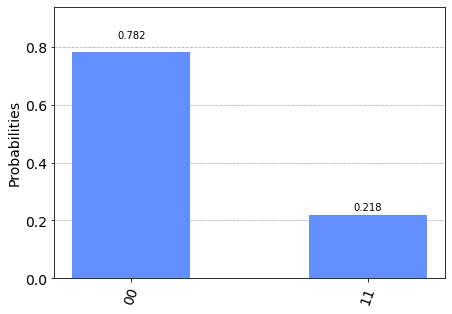

In [67]:
# Initialize your T1 and T2 values
t1 = 0.0125  
t2 = 0.0025   

# Apply the T1 and T2 to create the thermal relaxation error
from qiskit.providers.aer.noise import thermal_relaxation_error
t_error = thermal_relaxation_error(t1, t2, 0.01)

# Add the errors to a noise model 
# and apply to all basis gates on all qubits
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(t_error, ['id', 'u1', 'u2', 'u3'])
# Print out the noise model 
print(noise_model) 

#Create the same 2-qubit quantum circuit as before
qc_error = QuantumCircuit(2,2)
qc_error.h(0)
qc_error.cx(0,1)
qc_error.measure(range(2), range(2))

# Set the simulator 
simulator = Aer.get_backend('qasm_simulator')
# Apply the noise model we created to the execution method
result = execute(qc_error, simulator, shots=1024, basis_gates=noise_model.basis_gates, noise_model=noise_model).result()

# Obtain results and print
counts = result.get_counts(qc_error)
plot_histogram(counts)


# Build your own noise model

In [68]:
# Import the error classes and methods
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import ReadoutError

# Single and multi-qubit probability error
single_qubit_gate_p = 0.25  
multi_qubit_gate_p = 0.1   

# Apply the depolarizing quantum errors
single_error = depolarizing_error(single_qubit_gate_p, 1)
multi_error = depolarizing_error(multi_qubit_gate_p, 2)   


In [69]:
# Add the single and multi-qubit errors to the noise model
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(single_error, ['u2'])
noise_model.add_all_qubit_quantum_error(multi_error, ['cx'])

# Print out the noise model
print(noise_model)


NoiseModel:
  Basis gates: ['cx', 'id', 'u2', 'u3']
  Instructions with noise: ['cx', 'u2']
  All-qubits errors: ['u2', 'cx']


In [70]:
# Set the readout error probabilities for 0 given 1, & 1 given 0,
p0_1 = 0.7
p1_0 = 0.2
p0 = 1 - p0_1
p1 = 1 - p1_0

# Construct the ReadoutError with the probabilities
readout_error = ReadoutError([[p0, p0_1], [p1_0, p1]])
# Apply the readout error to qubit 0. 
noise_model.add_readout_error(readout_error, [0])
# Print the noise model
print(noise_model)


NoiseModel:
  Basis gates: ['cx', 'id', 'u2', 'u3']
  Instructions with noise: ['cx', 'u2', 'measure']
  Qubits with noise: [0]
  All-qubits errors: ['u2', 'cx']
  Specific qubit errors: [('measure', [0])]


In [71]:
# Create a simple 2 qubit circuit
qc_error = QuantumCircuit(2,2)
qc_error.h(0)
qc_error.cx(0,1)
qc_error.measure(range(2), range(2))


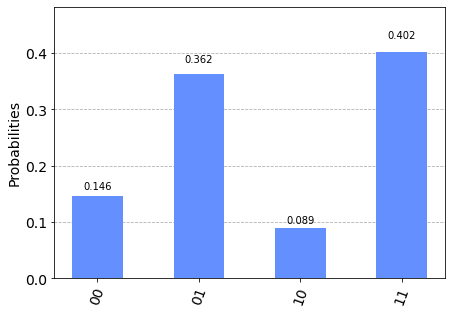

In [72]:
# Get the Qasm Simulator
simulator = Aer.get_backend('qasm_simulator')
# Set the backend parameters, including our noise model, and execute
result = execute(qc_error, simulator, shots=1024, basis_gates=noise_model.basis_gates, noise_model=noise_model).result()
# Obtain the result counts and print
counts = result.get_counts(qc_error)
plot_histogram(counts)


In [73]:
import qiskit.tools.jupyter
%qiskit_version_table